In [1]:
from sklearn.datasets import fetch_openml

X, y =  fetch_openml('mnist_784', version=1, return_X_y=True, parser='auto')
X = X.values
y = y.astype(int).values

print(X.shape)
print(y.shape)



(70000, 784)
(70000,)


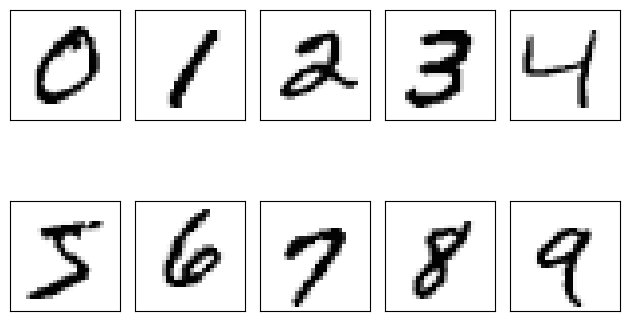

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows =2, ncols =5, sharex=True, sharey=True)
ax = ax.flatten()

for i in range(10):
    img = X[y == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')
    
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

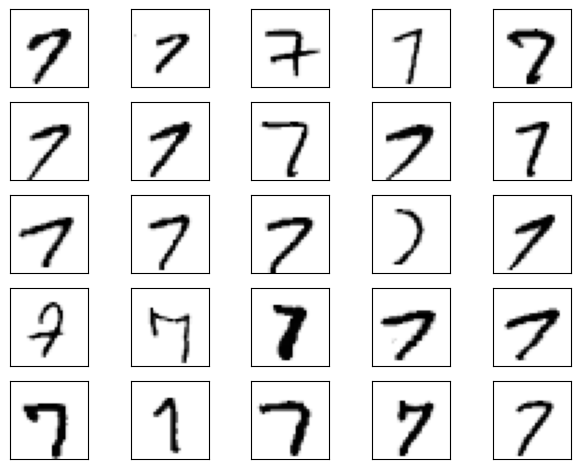

In [10]:
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(25):
    img = X[y == 7 ][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')
    
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=10000,
    random_state=123, stratify=y)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_temp, y_temp, test_size =5000,
    random_state=123, stratify=y_temp)

print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)
print(X_temp.shape)
print(y_temp.shape)

(55000, 784)
(5000, 784)
(55000,)
(5000,)
(60000, 784)
(60000,)


In [46]:
import numpy as np

def sigmoid(z):
    return 1. / (1. + np.exp(-z))

def int_to_onehot(y, num_labels):
    ary = np.zeros((y.shape[0], num_labels))
    for i, val in enumerate(y):
        ary[i, val] = 1
    return ary

In [47]:
class NeuralNetMLP:
    def __init__(self, num_features, num_hidden, num_classes, random_seed=123):
        self.num_classes = num_classes
        
        # hidden
        rng = np.random.RandomState(random_seed)
        self.weight_h = rng.normal(loc=0.0, scale = 0.1, size =(num_hidden, num_features))
        self.bias_h = np.zeros(num_hidden)
        
        # output
        self.weight_out = rng.normal(loc=0.0, scale=0.1, size=(num_classes, num_hidden))
        self.bias_out = np.zeros(num_classes)
        
    def forward(self, x):
        # Hidden layer
        z_h = np.dot(x, self.weight_h.T) + self.bias_h
        a_h = sigmoid(z_h)
        
        # output layer
        z_out = np.dot(a_h, self.weight_out.T) + self.bias_out
        a_out = sigmoid(z_out)
        
        return a_h, a_out

In [41]:
import numpy as np
num_epochs = 50
minibatch_size = 100

def minibatch_generator(X, y, minibatch_size):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    for start_idx in range(0, indices.shape[0] - minibatch_size+1, minibatch_size):
        batch_idx = indices[start_idx : start_idx + minibatch_size]
        yield X[batch_idx], y[batch_idx]
        
for i in range(num_epochs):
        # iterate over minibatches
    minibatch_gen = minibatch_generator(X_train, y_train, minibatch_size)
    for X_train_mini, y_train_mini in minibatch_gen:
        print(X_train_mini.shape)
        print(y_train_mini.shape)
        break
    break


(100, 784)
(100,)


In [48]:
def mse_loss(targets, probas, num_labels=10):
    onehot_targets = int_to_onehot(targets, num_labels=num_labels)
    return np.mean((onehot_targets - probas)**2)

def accuracy(targets, predicted_labels):
    return np.mean(predicted_labels == targets)


In [69]:
model = NeuralNetMLP(num_features = 28*28, num_hidden = 50, num_classes = 10)

_, probas = model.forward(X_valid)
mse = mse_loss(y_valid, probas)
print(f'Initial validation MSE : {mse:.1f}')

predicted_labels = np.argmax(probas, axis=1)
acc = accuracy(y_valid, predicted_labels)
print(f'Initial validation accuracy: {acc*100:.1f}%')

print(X_valid.shape)
print(y_valid.shape)
print(probas.shape)
print(predicted_labels.shape)

Initial validation MSE : 0.2
Initial validation accuracy: 11.2%
(5000, 784)
(5000,)
(5000, 10)
(5000,)


C:\Users\Donggu Lee\AppData\Local\Temp\ipykernel_24748\3591093896.py:4: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-z))


In [71]:
def compute_mse_and_acc(nnet, X, y, num_labels=10, minibatch_size=100):
    mse, correct_pred, num_examples = 0., 0, 0
    minibatch_gen = minibatch_generator(X, y, minibatch_size)
    
    for i, (features, targets) in enumerate(minibatch_gen):
        _, probas = nnet.forward(features)
        predicted_labels = np.argmax(probas, axis = 1)
        onehot_targets = int_to_onehot(targets, num_labels=num_labels)
        
        loss = np.mean((onehot_targets - probas)**2)
        correct_pred += (predicted_labels == targets).sum()
        num_examples += targets.shape[0]
        mse += loss
    
    mse = mse / (i+1)
    acc = correct_pred / num_examples
    return mse, acc

mse, acc = compute_mse_and_acc(model, X_valid, y_valid)
print(f'Initial valid MSE: {mse:.1f}')
print(f'Initial valid accuracy: {acc*100:.1f}%')

print(probas.shape)
print(X.shape)
print(y.shape)
print(X_valid.shape)
print(y_valid.shape)
print(predicted_labels.shape)

Initial valid MSE: 0.2
Initial valid accuracy: 11.2%
(5000, 10)
(70000, 784)
(70000,)
(5000, 784)
(5000,)
(5000,)


C:\Users\Donggu Lee\AppData\Local\Temp\ipykernel_24748\3591093896.py:4: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-z))
